In [2]:
import numpy as np
import pandas as pd
from geopy.geocoders import Nominatim
from collections import Counter
from operator import itemgetter
import matplotlib.pyplot as plt

In [3]:
hotelReviews = pd.read_csv('Hotel_Reviews.csv')
hotel_info = hotelReviews[['Hotel_Name', 'Hotel_Address']]
hotel_info = hotel_info.drop_duplicates()

# By Manual Analysis, we found that hotels from only these cities and nationalities are represented in the dataset

In [15]:
allCities = ['Paris', 'Amsterdam', 'London', 'Milan', 'Roma', 'Barcelona', 'Vienna']
allCountries = ['France', 'Netherlands', 'United Kingdom', 'Italy', 'Spain', 'Austria']

# Extraction of City and Nation of Hotels and appending them to the dataset for ease of access

In [5]:
cities = [['Paris'], ['Amsterdam'], ['London'], ['Milan', 'Roma'], ['Barcelona'], ['Vienna']]
countries = ['France', 'Netherlands', 'United Kingdom', 'Italy', 'Spain', 'Austria']

Country = []
City = []

for a in hotel_info['Hotel_Address']:
    for c_i in range(len(countries)):
        if countries[c_i] in a:
            Country.append(countries[c_i])
            cty = []
            for ct_i in cities[c_i]:
                if ct_i in a:
                    cty.append(ct_i)
            City.append(cty[-1])
                    
hotel_info['Country'] = Country
hotel_info['City'] = City

hotel_info.to_csv('Hotel_Info_Country_City.csv')

citiesDict = dict()
countriesDict = dict()

i = 0
for hn in hotel_info['Hotel_Name']:
    citiesDict[hn] = City[i]
    countriesDict[hn] = Country[i]
    i += 1
    
hnCities = []
hnCountries = []
for hName in hotelReviews['Hotel_Name']:
    hnCities.append(citiesDict[hName])
    hnCountries.append(countriesDict[hName])
hotelReviews['Country'] = hnCountries
hotelReviews['City'] = hnCities

hotelReviews.to_csv('HotelReviewsCountryCity.csv')

# Average score of Hotels or Cities or Nations by Reviewer Nationality

In [273]:
def plotRelat(hotelReviews, Type = 'Hotel_Name', Nationality = ' United Kingdom ', Threshold = 100):

    df = hotelReviews[[Type, 'Reviewer_Nationality', 'Reviewer_Score']]
    df = df.loc[df['Reviewer_Nationality'] == Nationality]

    relatNames = list(set(df[Type]))

    print 'Review Data'
    reviewData = []
    for rn in relatNames:
        ratings = np.array(df.loc[df[Type] == rn]['Reviewer_Score'])
        if ratings.shape[0] >= Threshold:
            reviewData.append([rn, np.mean(ratings), np.std(ratings), ratings.shape[0]])
    
    print 'Relative Names and Reviews'
    relNames = []
    relRevs = []
    for i in reversed(sorted(reviewData, key=itemgetter(1))):
        relNames.append(i[0])
        relRevs.append(i[1])
    
    print 'Plotting'
    
    objects = relNames
    y_pos = np.arange(len(relNames))
    performance = relRevs

    fig_size = plt.rcParams["figure.figsize"]
 
    fig_size[0] = 12
    fig_size[1] = 12

    plt.ylim([0,10])
    plt.bar(y_pos, performance, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('Mean Reviews')
    plt.title('Reviews of'+Nationality+' Nationales by '+Type)

    plt.savefig('Reviews of'+Nationality+' Nationales by '+Type)
    plt.clf()
    #plt.show()

# Analysis of Cities and Nations by Reviewer Nationalities

In [276]:
Nats = [' United Kingdom ', ' United States of America ', ' Australia ', ' Ireland ']

for n in Nats:
    plotRelat(hotelReviews, Type = 'Country', Nationality=n, Threshold=0)
    plotRelat(hotelReviews, Type = 'City', Nationality=n, Threshold=0)

Review Data
Relative Names and Reviews
Plotting
Review Data
Relative Names and Reviews
Plotting
Review Data
Relative Names and Reviews
Plotting
Review Data
Relative Names and Reviews
Plotting
Review Data
Relative Names and Reviews
Plotting
Review Data
Relative Names and Reviews
Plotting
Review Data
Relative Names and Reviews
Plotting
Review Data
Relative Names and Reviews
Plotting


# Average Rating of Hotels From Each City

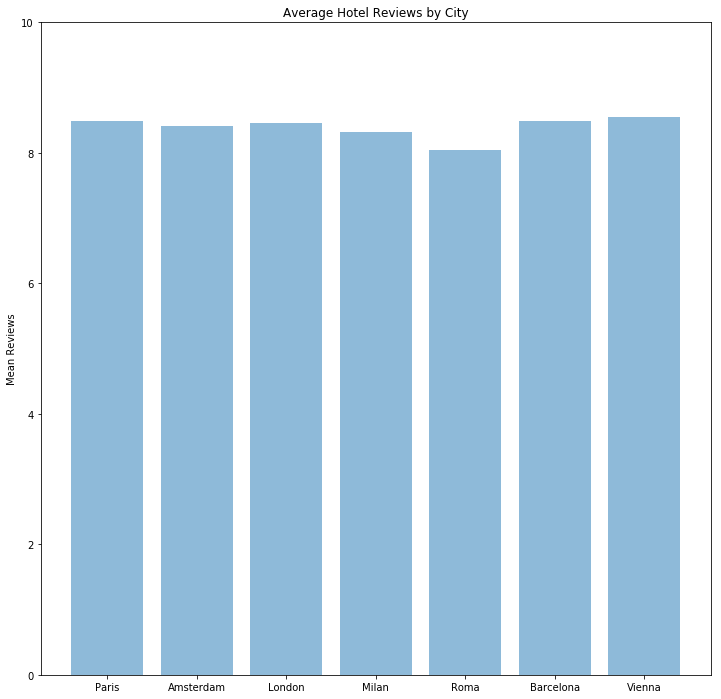

In [34]:
cityMeans = []
for c in allCities:
    hrc = hotelReviews.loc[hotelReviews['City'] == c][['Hotel_Name','Average_Score']]
    hrc = hrc.drop_duplicates()
    cityMeans.append(np.mean(hrc['Average_Score']))

fig_size = plt.rcParams["figure.figsize"]
 
fig_size[0] = 12
fig_size[1] = 12

objects = allCities
y_pos = np.arange(len(allCities))
performance = cityMeans

plt.ylim([0,10])
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Mean Reviews')
plt.title('Average Hotel Reviews by City')
plt.savefig('Average Hotel Reviews by City')
plt.show()

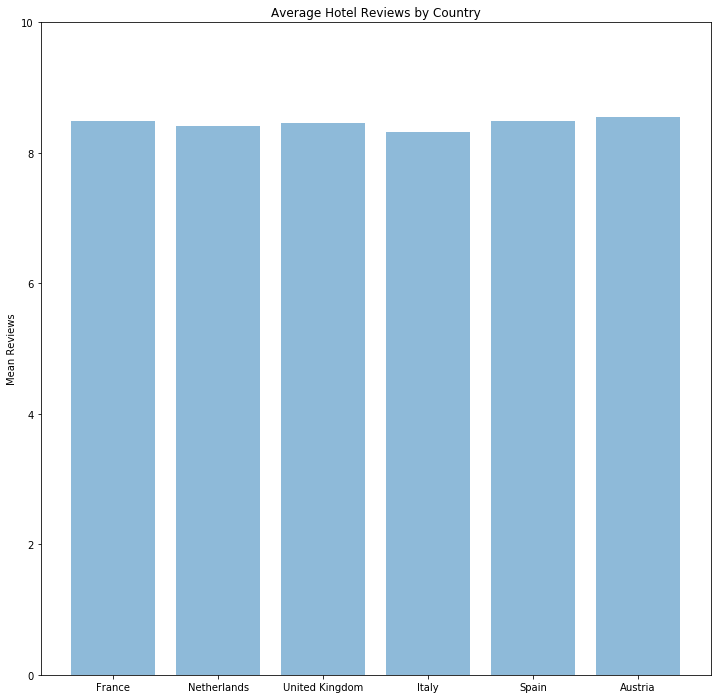

In [36]:
cntMeans = []
for c in allCountries:
    hrc = hotelReviews.loc[hotelReviews['Country'] == c][['Hotel_Name','Average_Score']]
    hrc = hrc.drop_duplicates()
    cntMeans.append(np.mean(hrc['Average_Score']))

fig_size = plt.rcParams["figure.figsize"]
 
fig_size[0] = 12
fig_size[1] = 12

objects = allCountries
y_pos = np.arange(len(allCountries))
performance = cntMeans

plt.ylim([0,10])
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Mean Reviews')
plt.title('Average Hotel Reviews by Country')
plt.savefig('Average Hotel Reviews by Country')
plt.show()